In [1]:
import pandas as pd

In [2]:
injections_per_fm = 700

In [3]:
df = pd.read_csv("./results_stdout.csv")
df.columns = ["Group", "Type", *df.columns[2:]]
df

,Group,Type,Output error,Classification error,Other error
0,fp32,FLIP_SINGLE_BIT,7.428571,0.571429,0.000000
1,fp32,FLIP_TWO_BITS,8.857143,1.714286,0.000000
2,fp32,RANDOM_VALUE,41.857143,7.714286,0.000000
3,fp32,ZERO_VALUE,13.714286,0.142857,0.000000
4,gp,FLIP_SINGLE_BIT,8.714286,0.428571,6.285714
5,gp,FLIP_TWO_BITS,12.000000,0.714286,6.285714
6,gp,RANDOM_VALUE,39.285714,7.142857,10.142857
7,gp,ZERO_VALUE,17.714286,0.000000,6.714286


<Axes: title={'center': 'GP error measurements'}, xlabel='Type', ylabel='error rate %'>

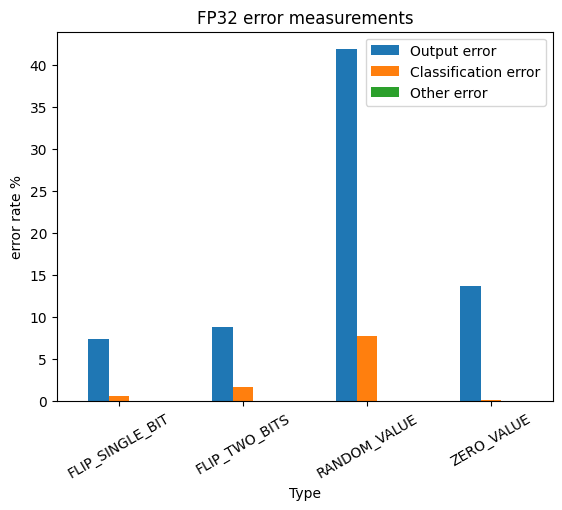

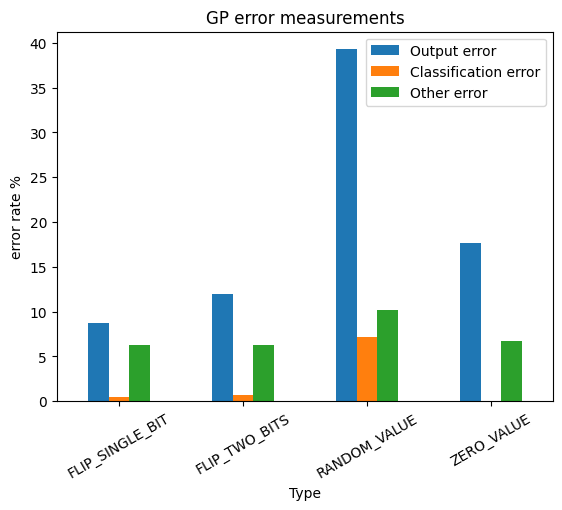

In [4]:
df_fp32 = df[df["Group"] == "fp32"]
df_gp = df[df["Group"] == "gp"]
df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_fp32.plot(kind="bar", ylabel="error rate %", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel="error rate %", title="GP error measurements", rot=30)

In [5]:
df_kernels = pd.read_csv("./results_kernel.csv")
df_kernels.columns = ["Kernel", *df_kernels.columns[1:]]
df_kernels

,Kernel,Output error,Classification error,Masked,Other error
0,volta_sgemm_128x32_tn,532,123,2400,123
1,voidattention_kernel_batched<AttentionKernel<f...,46,2,272,6
2,volta_sgemm_64x32_sliced1x4_tn,425,2,1585,90
3,voidat::native::vectorized_elementwise_kernel<...,12,2,32,1
4,voidat::native::(anonymousnamespace)::vectoriz...,7,0,28,0
5,"voidimplicit_convolve_sgemm<float,float,1024,5...",22,0,19,4
6,voidat::native::vectorized_elementwise_kernel<...,1,0,1,1
7,"voidat::native::elementwise_kernel<128,2,at::n...",1,0,0,0
8,voidat::native::(anonymousnamespace)::CatArray...,0,0,0,1
9,"voidgemv2T_kernel_val<int,int,float,float,floa...",1,0,0,0


<Axes: xlabel='Kernel'>

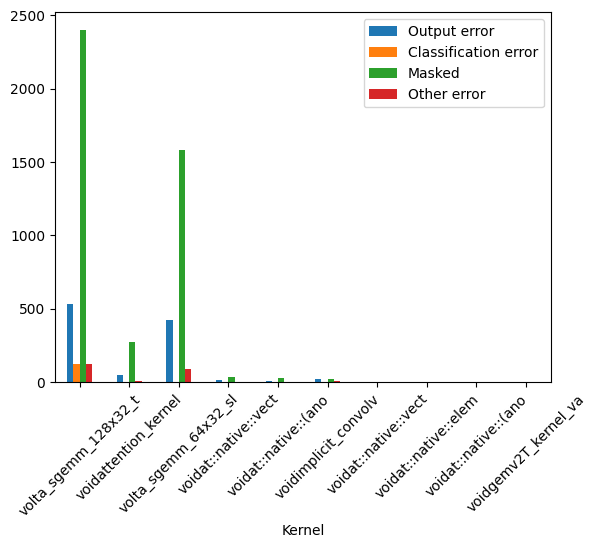

In [6]:
df_kernels.index = pd.Series([k[:20] for k in df_kernels["Kernel"]], name="Kernel")
df_kernels.plot(kind="bar", rot=45,)